 <h1> </h1>

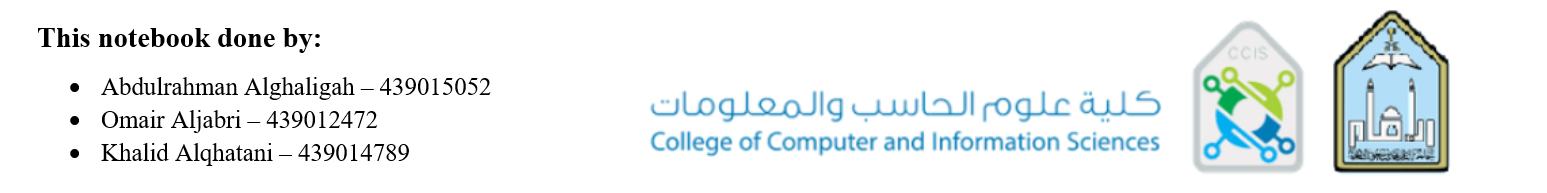

 <h1> </h1>

<h1 align="center"> <font color='#87cefa'> Comparative Performance of Kruskal and Prim MST Algorithms</font></h1>

 <h1> </h1>

## 1. Description and source of the dataset

### 1.1 Description:

- We created this dataset with the help of Google Maps to compute the distance between hospitals.
- The dataset contsins of 20 hospitals in Riyadh city.
- Each row represent a hospital and each column represent the distance between two hospitals.

### 1.2 Source code and dataset

In [2]:
# Importing nesseccery libraries.
import pandas as pd 
import numpy as np
import time

# Reading the dataset file.
df = pd.read_csv('dataset.csv')

In [3]:
df 

,hospital,d0,d1,d2,d3,d4,d5,d6,d7,d8,...,d10,d11,d12,d13,d14,d15,d16,d17,d18,d19
0,Prince Mohammed Bin Abdulaziz Hospital,0.0,16.8,2.2,1.7,20.5,25.1,8.9,13.5,15.4,...,11.5,24.2,14.8,19.1,22.1,16.0,19.7,15.9,3.4,25.2
1,King Faisal Specialist Hospital & Research Centre,16.8,0.0,16.3,16.8,7.8,12.4,12.0,5.6,24.8,...,8.6,10.5,25.4,24.1,11.0,20.9,6.8,7.4,13.3,18.1
2,Al Yamamah Hospital,2.2,16.3,0.0,2.3,21.1,26.0,9.6,14.3,14.4,...,12.2,27.6,14.4,19.8,22.1,13.7,20.4,18.3,4.1,25.8
3,Riyadh Care Hospital,1.7,16.8,2.3,0.0,15.9,25.1,7.2,13.5,15.4,...,9.8,24.0,16.0,18.9,21.2,15.7,18.9,17.4,3.0,24.9
4,King Saud Medical City-Pediatric Hospital,20.5,7.8,21.1,15.9,0.0,17.4,10.3,10.6,29.8,...,7.2,16.4,30.4,29.0,16.0,25.9,11.8,12.4,16.9,23.0
5,Eradah (Al Amal) Mental Health Complex,25.1,12.4,26.0,25.1,17.4,0.0,20.2,15.6,34.7,...,18.7,3.9,35.4,21.5,8.4,18.4,9.0,11.0,23.2,14.8
6,Security Forces Hospital,8.9,12.0,9.6,7.2,10.3,20.2,0.0,5.1,20.0,...,3.7,16.2,20.6,19.2,13.4,16.0,12.2,8.4,8.4,18.3
7,Prince Sultan Military Medical City,13.5,5.6,14.3,13.5,10.6,15.6,5.1,0.0,19.4,...,4.1,14.9,21.8,18.7,12.1,15.5,10.6,6.9,7.9,17.8
8,Ministry of National Guard - Health Affairs,15.4,24.8,14.4,15.4,29.8,34.7,20.0,19.4,0.0,...,23.8,30.8,3.6,25.2,28.0,19.5,27.4,26.3,12.2,31.2
9,King Fahad Medical City (KFMC),12.7,4.8,13.3,11.8,8.8,14.7,5.2,3.3,21.4,...,5.4,16.2,21.3,20.0,14.2,16.8,9.4,6.1,9.2,19.1


In [4]:
df = df.drop(columns='hospital') # dropping hospital column

In [5]:
arr = df.values # transferring dataframe to NumPy array.
arr # print the array.

array([[ 0. , 16.8,  2.2,  1.7, 20.5, 25.1,  8.9, 13.5, 15.4, 12.7, 11.5,
        24.2, 14.8, 19.1, 22.1, 16. , 19.7, 15.9,  3.4, 25.2],
       [16.8,  0. , 16.3, 16.8,  7.8, 12.4, 12. ,  5.6, 24.8,  4.8,  8.6,
        10.5, 25.4, 24.1, 11. , 20.9,  6.8,  7.4, 13.3, 18.1],
       [ 2.2, 16.3,  0. ,  2.3, 21.1, 26. ,  9.6, 14.3, 14.4, 13.3, 12.2,
        27.6, 14.4, 19.8, 22.1, 13.7, 20.4, 18.3,  4.1, 25.8],
       [ 1.7, 16.8,  2.3,  0. , 15.9, 25.1,  7.2, 13.5, 15.4, 11.8,  9.8,
        24. , 16. , 18.9, 21.2, 15.7, 18.9, 17.4,  3. , 24.9],
       [20.5,  7.8, 21.1, 15.9,  0. , 17.4, 10.3, 10.6, 29.8,  8.8,  7.2,
        16.4, 30.4, 29. , 16. , 25.9, 11.8, 12.4, 16.9, 23. ],
       [25.1, 12.4, 26. , 25.1, 17.4,  0. , 20.2, 15.6, 34.7, 14.7, 18.7,
         3.9, 35.4, 21.5,  8.4, 18.4,  9. , 11. , 23.2, 14.8],
       [ 8.9, 12. ,  9.6,  7.2, 10.3, 20.2,  0. ,  5.1, 20. ,  5.2,  3.7,
        16.2, 20.6, 19.2, 13.4, 16. , 12.2,  8.4,  8.4, 18.3],
       [13.5,  5.6, 14.3, 13.5, 10.6, 15.

In [6]:
number_of_nodes = df.shape[0] # finding the number of nodes 
number_of_nodes # print number of nodes

20

## 2. Finding MST by both algorithms

### 2.1 Kurskal Algorithm

In [7]:
class Graph:
    def __init__(self, vertex):
        self.V = vertex # asign to var v the vertex number.
        self.graph = [] # Create a graph list.
 
    def add_edge(self, u, v, w):
        self.graph.append([u, v, w])
     
    def search(self, parent, i):
        if parent[i] == i:
            return i
        return self.search(parent, parent[i])
 
    def apply_union(self, parent, rank, x, y):
        xroot = self.search(parent, x)
        yroot = self.search(parent, y)
        if rank[xroot] < rank[yroot]:
            parent[xroot] = yroot
        elif rank[xroot] > rank[yroot]:
            parent[yroot] = xroot
        else:
            parent[yroot] = xroot
            rank[xroot] += 1
    
    def add_To_Graph(self): 
        i = 0
        j = 0
        
        for i in range(self.V):
            for j in range(self.V):
                self.graph.append([i, j, arr[i][j]])
    
    def kruskal(self):
        result = []
        i, e, totalWeight,edges = 0, 0, 0,0
        self.graph = sorted(self.graph, key=lambda item: item[2])
        parent = []
        rank = []
        for node in range(self.V):
            parent.append(node)
            rank.append(0)
        while e < self.V - 1:
            u, v, w = self.graph[i]
            i = i + 1
            x = self.search(parent, u)
            y = self.search(parent, v)
            if x != y:
                e = e + 1
                result.append([u, v, w])
                self.apply_union(parent, rank, x, y)
        for u, v, weight in result:
            print("From vertex (",u,"to", v,")",end =" ")
            print("with weight equals",weight,"km")
            totalWeight = totalWeight+weight
            edges+=1
        
        print("\nThe total weight of MST using kruskal algorithm is", totalWeight,"km")
        print("\nThe total number of edges is",edges)

In [8]:
g = Graph(number_of_nodes)
g.add_To_Graph()

StartTime_Kruskal = time.time()
g.kruskal()
EndTime_Kruskal = time.time()

From vertex ( 0 to 3 ) with weight equals 1.7 km
From vertex ( 0 to 2 ) with weight equals 2.2 km
From vertex ( 3 to 18 ) with weight equals 3.0 km
From vertex ( 7 to 9 ) with weight equals 3.3 km
From vertex ( 8 to 12 ) with weight equals 3.6 km
From vertex ( 6 to 10 ) with weight equals 3.7 km
From vertex ( 5 to 11 ) with weight equals 3.9 km
From vertex ( 7 to 10 ) with weight equals 4.1 km
From vertex ( 1 to 9 ) with weight equals 4.8 km
From vertex ( 16 to 17 ) with weight equals 4.8 km
From vertex ( 14 to 16 ) with weight equals 4.9 km
From vertex ( 9 to 17 ) with weight equals 6.1 km
From vertex ( 11 to 16 ) with weight equals 6.2 km
From vertex ( 3 to 6 ) with weight equals 7.2 km
From vertex ( 4 to 10 ) with weight equals 7.2 km
From vertex ( 13 to 19 ) with weight equals 7.5 km
From vertex ( 14 to 19 ) with weight equals 9.1 km
From vertex ( 13 to 15 ) with weight equals 9.3 km
From vertex ( 8 to 18 ) with weight equals 12.2 km

The total weight of MST using kruskal algorithm

### 2.2 Prims Algorithm

In [9]:
# Prim's Algorithm in Python

StartTime__Prims = time.time()

INF = 9999999
# number of vertices in graph
N = number_of_nodes
#creating graph by adjacency matrix method
G = arr
selected_node = []

for i in range(number_of_nodes):
  selected_node.append(0)
    


no_edge = 0

selected_node[0] = True
total=0
edges=0

# printing for edge and weight
while (no_edge < N - 1):
    minimum = INF
    a = 0
    b = 0
    for m in range(N):
        if selected_node[m]:
            for n in range(N):
                if ((not selected_node[n]) and G[m][n]):  
                  
                    # not in selected and there is an edge
                    if minimum > G[m][n]:
                       
                       minimum = G[m][n]
                       a = m
                       b = n
                       

                        
                        
    print("From vertex (",a,"to", b,")",end =" ")
    total+=G[a][b]
    edges+=1
    print("with weight equals",G[a][b],"km")    
    selected_node[b] = True
    no_edge += 1
print("\nThe total weight of MST using prims algorithm is",total,"km")
print("\nThe total number of edges is",edges)

EndTime_Prims = time.time()

From vertex ( 0 to 3 ) with weight equals 1.7 km
From vertex ( 0 to 2 ) with weight equals 2.2 km
From vertex ( 3 to 18 ) with weight equals 3.0 km
From vertex ( 3 to 6 ) with weight equals 7.2 km
From vertex ( 6 to 10 ) with weight equals 3.7 km
From vertex ( 10 to 7 ) with weight equals 4.1 km
From vertex ( 7 to 9 ) with weight equals 3.3 km
From vertex ( 9 to 1 ) with weight equals 4.8 km
From vertex ( 9 to 17 ) with weight equals 6.1 km
From vertex ( 17 to 16 ) with weight equals 4.8 km
From vertex ( 16 to 14 ) with weight equals 4.9 km
From vertex ( 16 to 11 ) with weight equals 6.2 km
From vertex ( 11 to 5 ) with weight equals 3.9 km
From vertex ( 10 to 4 ) with weight equals 7.2 km
From vertex ( 14 to 19 ) with weight equals 9.1 km
From vertex ( 19 to 13 ) with weight equals 7.5 km
From vertex ( 13 to 15 ) with weight equals 9.3 km
From vertex ( 18 to 8 ) with weight equals 12.2 km
From vertex ( 8 to 12 ) with weight equals 3.6 km

The total weight of MST using prims algorithm i

### The Minimum Spanning Tree (MST) provided by both algorithms:

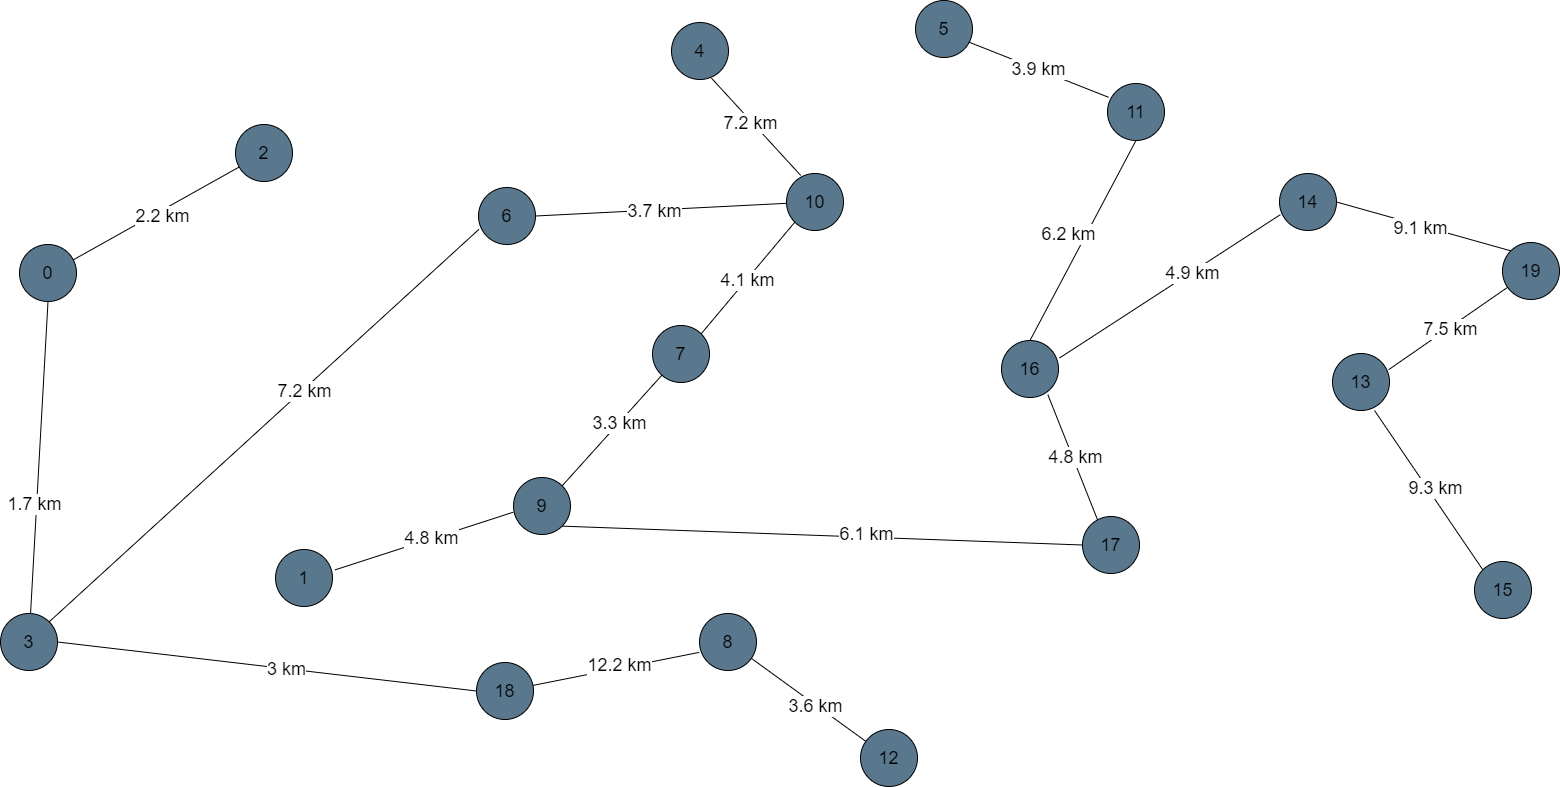

### 3.Algorithms Time Complexity

### Specifications:

The results in this project were tested on these specifications:
- Device name: MSI GP62 7rex leopard pro.
- CPU: Intel Core i7 7700HQ.
- RAM: 16GB (2400 MHz) DDR4.

The time Complexity of kruskal algorithm is: 

In [10]:
print((EndTime_Kruskal-StartTime_Kruskal)*1000)

8.978128433227539


The time Complexity of prims algorithm is:

In [11]:
print((EndTime_Prims-StartTime__Prims)*1000)

10.970830917358398


|Algorithm||Time taken|
|---------||------------------------------------|
|Kruskal ||8.97 ms|
|Prims||10.97 ms|

### Conclusion: 

- Both algorithms porvided same minimum spanning tree (MST).
- The MST distance, produced by both algorithms, for the 20 hospitals is 104.8 km.
- The time taken for Kruskal's algorithm is better than prim's algorithm.
- Prim's algorithm runs faster in dense graphs where Kruskal's algorithm runs faster in sparse graphs.